<a href="https://colab.research.google.com/github/Prerna99-star/Customer-Recommendation-using-PCA/blob/master/Copy_of_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
print(dataset)
print(X)
print(y)

     Alcohol  Malic_Acid   Ash  ...  OD280  Proline  Customer_Segment
0      14.23        1.71  2.43  ...   3.92     1065                 1
1      13.20        1.78  2.14  ...   3.40     1050                 1
2      13.16        2.36  2.67  ...   3.17     1185                 1
3      14.37        1.95  2.50  ...   3.45     1480                 1
4      13.24        2.59  2.87  ...   2.93      735                 1
..       ...         ...   ...  ...    ...      ...               ...
173    13.71        5.65  2.45  ...   1.74      740                 3
174    13.40        3.91  2.48  ...   1.56      750                 3
175    13.27        4.28  2.26  ...   1.56      835                 3
176    13.17        2.59  2.37  ...   1.62      840                 3
177    14.13        4.10  2.74  ...   1.60      560                 3

[178 rows x 14 columns]
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)


[[ 0.79996869  0.63400362  0.71783316 ...  0.05445565  1.0713277
   0.31500451]
 [-0.49875982  0.06171955 -0.61072701 ... -0.93473577 -1.39249704
  -0.18138885]
 [-1.29797736 -1.16332605 -0.24168252 ...  0.18348062  0.75296832
   0.45068536]
 ...
 [-0.72353975 -0.69834524 -0.64763146 ...  0.48453887  0.51765922
  -1.33964004]
 [ 1.12465081 -0.63575167 -0.90596261 ... -0.16058596  1.02980256
   0.77830498]
 [ 1.44933294  0.10642924  0.42259757 ... -1.40782731 -1.21255479
  -0.29721397]]


In [31]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(X_train)


[[-3.75722986e+00  1.78224173e+00]
 [ 3.71779979e+00  8.55757484e-01]
 [-4.41722893e-02 -2.02249034e+00]
 [ 3.50295061e+00  1.99910076e+00]
 [-3.87566163e+00  2.65077482e+00]
 [ 3.31635950e+00  7.26729526e-01]
 [ 3.76757806e+00  1.03585429e+00]
 [-3.50642318e+00  1.01134789e-01]
 [ 5.56617679e+00  2.31052117e+00]
 [-5.52600002e+00  6.92702501e-01]
 [ 3.34933278e-01 -3.89801248e+00]
 [ 4.83234812e+00  3.19745682e+00]
 [ 3.43511567e+00  9.59123009e-01]
 [-1.06452054e+00 -2.32005170e+00]
 [ 3.47410738e+00  6.35730414e-01]
 [ 5.06710351e+00  2.38898005e+00]
 [-2.95021113e+00  1.13904083e+00]
 [ 1.87126516e+00 -4.32025549e-01]
 [ 3.96376090e+00 -1.85802042e-01]
 [-9.49159879e-01 -3.32074700e+00]
 [ 1.84114933e+00 -5.83464878e-01]
 [ 3.17380882e+00  1.49403616e+00]
 [-4.69174963e-01 -1.18843006e+00]
 [-4.01401200e+00  1.22643116e+00]
 [ 2.41908539e+00 -2.41633744e+00]
 [-1.19274638e+00 -2.30261770e+00]
 [ 2.54081586e+00 -1.08324295e+00]
 [-1.62865764e+00  4.75402524e-01]
 [-5.44639445e+00  2

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


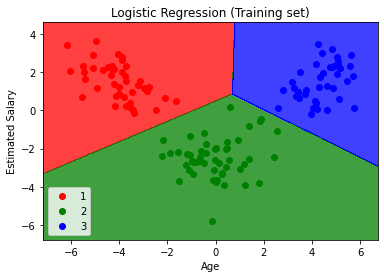

In [35]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


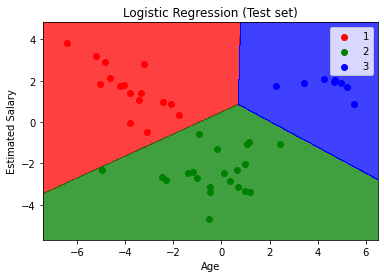

In [36]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
